<a href="https://colab.research.google.com/github/Manasi758/TCS-ion-Rio-210--Classification-of-Drug-Trail-Dataset/blob/main/Interim_Report_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install faker


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.6 MB/s eta 0:00:00


**Importing Libraries**

In [ ]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = Faker()


**Creating name column with Faker**

In [ ]:
def create_names(n):
   name = []
   for _ in range(0, n):
        name.append(df.name())
   return name

In [ ]:
name = create_names(362806)


In [ ]:
df_name = pd.DataFrame(list(zip(name)),columns = ['Name'])
df_name.head()

,Name
0,Michelle Taylor
1,Anna Mendoza DDS
2,Donna Mccarty
3,Heidi Thomas
4,Jessica Cantu


In [ ]:

df_name.shape


(362806, 1)

**Creating race column**

In [ ]:
def weighted_cartesian_choice(*iterables):
    # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list 
    #with a chocie from each population
    
    res = []
    for population, weights in iterables:
     #normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res
race = (['White','Hispanic', 'Black','Asian'], 
        [.32,.28,.22,.18])

list=[]
for i in range(362806):
    res = weighted_cartesian_choice(race)
    list.append(res)


In [ ]:
df_race=pd.DataFrame(list, columns = ['Race'])
df_race.head()

,Race
0,White
1,Black
2,White
3,Black
4,White


**Concatenating name and race columns**

In [ ]:
df_nr = pd.concat([df_name, df_race], axis=1).reindex(df_race.index)

In [ ]:
df_drugs = pd.read_csv("/content/drive/MyDrive/webmd.csv")

**Creating the final dataset**

In [ ]:
data_drugs = pd.concat([df_nr, df_drugs], axis=1).reindex(df_drugs.index)
data_drugs.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Michelle Taylor,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Anna Mendoza DDS,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Donna Mccarty,White,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Heidi Thomas,Black,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Jessica Cantu,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [ ]:
data_drugs = data_drugs.to_csv('dataset_drugs.csv', index=False)


**Loading Dataset**

In [ ]:
data = pd.read_csv('dataset_drugs.csv')
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Michelle Taylor,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Anna Mendoza DDS,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Donna Mccarty,White,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Heidi Thomas,Black,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Jessica Cantu,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


**Description of the dataset**

Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful

**Understanding the dataset**

In [ ]:
data.head()


,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Michelle Taylor,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Anna Mendoza DDS,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Donna Mccarty,White,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Heidi Thomas,Black,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Jessica Cantu,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [ ]:
data.tail()


,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,Deanna Brown,Asian,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,Ashley Doyle,White,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,Albert Valdez,White,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,Stephanie Wolfe,White,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,Anthony King,White,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


Insight:

The info() method will give summary of the dataset. We can know the basic information about the dataset including the type of columns, non-null values and memory usage. This dataset contains 9 categorical variables and 5 integer variables.

In [ ]:
data.shape


(362806, 14)

Insight:

The dataset contains 362806 rows and 14 columns.

**Checking for any NULL values**

In [ ]:
data.isnull().any()


Name             False
Race             False
Age              False
Condition        False
Date             False
Drug             False
DrugId           False
EaseofUse        False
Effectiveness    False
Reviews           True
Satisfaction     False
Sex              False
Sides            False
UsefulCount      False
dtype: bool

In [ ]:
data.isna().sum()


Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

**Insight**:

'Reviews' column has 37 missing values.

**Datatypes of columns**


In [ ]:
data.dtypes


Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

**Insight**:

The dataset contains five integer datatype fields and nine object datatype fields.

**Descriptive statistics**

In [ ]:
data.describe()


,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


**Insight**:

EaseofUse, Effectiveness and Satisfaction ranges from 1 to 10. UsefulCount varies from 0 to 255.

**Summary statistics - Object datatype**

In [ ]:
data.describe(include='object').T

,count,unique,top,freq
Name,362806,180774,Michael Smith,147
Race,362806,4,White,116493
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250167,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460


**Insight**:

Age group between 45 to 54 is the highest.

Female patients are more than male patients.

The use of cymbalta is highest when compared with other drugs.

**Checking for duplicate values**

In [ ]:
data.duplicated().sum()


0

**Insight**:

There are no duplicate values present in the dataset.

**Exploring the column names**

In [ ]:
data.columns


Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

**Selection of drug: A particular drug named Lisinopril with DrugId 6873 is selected in building a classification model to determine side effects**

In [ ]:

drug_lisinopril= data.loc[(data['Drug'] =='lisinopril')]
drug_lisinopril.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
14354,William Rodriguez,Hispanic,,High Blood Pressure,2/29/2020,lisinopril,6873,5,5,No Script or health Insurance needed to place ...,5,,"Dizziness , lightheadedness , tiredness, or ...",14
14356,William Todd,White,75 or over,High Blood Pressure,2/8/2020,lisinopril,6873,5,4,I have developed a very itch rash on my body f...,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3
14358,Christopher Anderson,Asian,55-64,High Blood Pressure,1/14/2020,lisinopril,6873,4,5,"tried alternative medicine Beet root, hibiscus...",4,Male,"Dizziness , lightheadedness , tiredness, or ...",3
14364,Jaime Villa,Asian,65-74,High Blood Pressure,10/17/2019,lisinopril,6873,5,5,Have been taking 10 mg doses per day for over ...,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6
14367,Timothy Brown,Asian,55-64,High Blood Pressure,10/13/2019,lisinopril,6873,2,4,I don't like that I'm taking this and not know...,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12


In [ ]:
drug_lisinopril.shape


(4269, 14)

In [ ]:
drug_lisinopril['Condition'].value_counts()


High Blood Pressure                                         3834
Other                                                        111
Kidney Disease from Diabetes                                 103
Heart Attack                                                  88
Chronic Heart Failure                                         42
Prevention of Recurrent Atrial Fibrillation                   23
Failure of the Left Ventricle of the Heart                    19
Migraine Prevention                                           18
Kidney Problem caused by Body Tissue Disease-Scleroderma      15
Nondiabetic Proteinuric Nephropathy                            9
Retinal Changes of Eye in a Patient with Diabetes              4
Diastolic Heart Failure                                        3
Name: Condition, dtype: int64

In [ ]:
drug_lisinopril['Age'].value_counts()


55-64         1191
45-54         1111
65-74          766
35-44          531
75 or over     331
25-34          171
               135
19-24           28
13-18            3
0-2              1
7-12             1
Name: Age, dtype: int64

In [ ]:
data_new = drug_lisinopril.copy()
data_copy = data.copy()

**DATA PREPROCESSING**

1. Handling whitespaces

In [ ]:
# Handling instances with whitespaces

for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])
data_new.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
14354,William Rodriguez,Hispanic,NaN,High Blood Pressure,2/29/2020,lisinopril,6873.0,5.0,5.0,No Script or health Insurance needed to place ...,5.0,NaN,"Dizziness , lightheadedness , tiredness, or ...",14.0
14356,William Todd,White,75 or over,High Blood Pressure,2/8/2020,lisinopril,6873.0,5.0,4.0,I have developed a very itch rash on my body f...,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0
14358,Christopher Anderson,Asian,55-64,High Blood Pressure,1/14/2020,lisinopril,6873.0,4.0,5.0,"tried alternative medicine Beet root, hibiscus...",4.0,Male,"Dizziness , lightheadedness , tiredness, or ...",3.0
14364,Jaime Villa,Asian,65-74,High Blood Pressure,10/17/2019,lisinopril,6873.0,5.0,5.0,Have been taking 10 mg doses per day for over ...,5.0,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0
14367,Timothy Brown,Asian,55-64,High Blood Pressure,10/13/2019,lisinopril,6873.0,2.0,4.0,I don't like that I'm taking this and not know...,2.0,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0


2. Missing values handling

In [ ]:
#checking missing values

data_new.isnull().sum()

Name               0
Race               0
Age              135
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          783
Satisfaction       0
Sex              247
Sides              0
UsefulCount        0
dtype: int64

**Bar plot showing the null value count of each feature**

Text(0.5, 1.0, 'Total Missing Values')

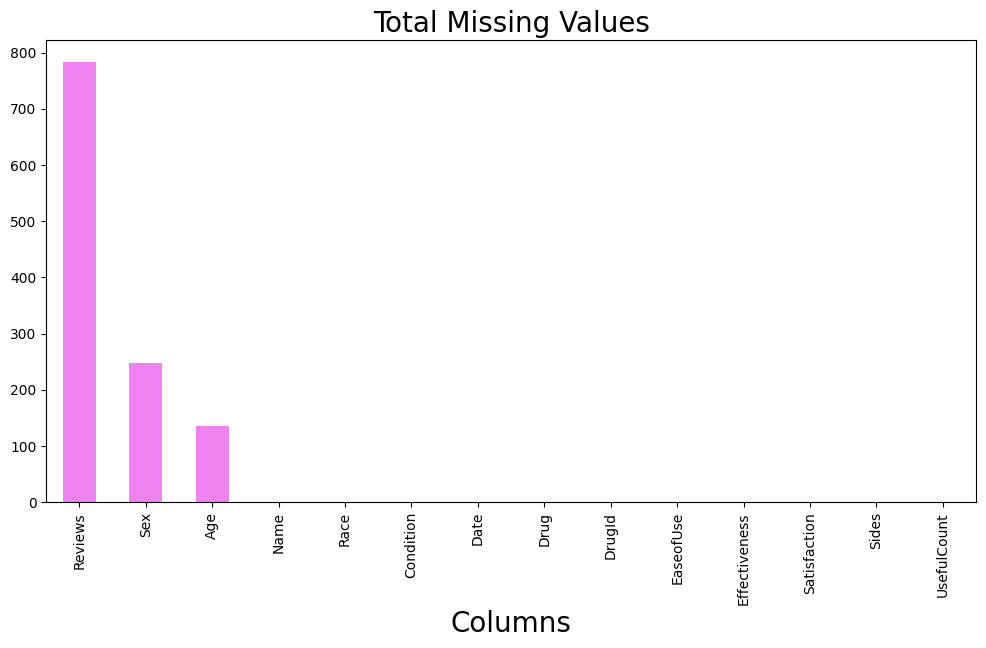

In [ ]:
missing = (data_new.isnull().sum()).sort_values(ascending=False)
missing.plot(kind="bar", figsize = (12,6), fontsize = 10, color='violet')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [ ]:
# Removing rows with null data

data_new=data_new.dropna(axis=0)
data_new.isnull().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
data_new.shape


(3263, 14)

3.Handling Age group


In [ ]:
data_new['Age'].value_counts()

55-64         956
45-54         880
65-74         574
35-44         429
75 or over    245
25-34         153
19-24          22
13-18           3
0-2             1
Name: Age, dtype: int64

In [ ]:
data_new['Age'].unique()

array(['75 or over', '55-64', '65-74', '25-34', '35-44', '45-54', '19-24',
       '13-18', '0-2'], dtype=object)

In [ ]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')
data_new['Age'].value_counts()

55-64     956
45-54     880
65-74     574
35-44     429
75-100    245
25-34     153
19-24      22
13-18       3
0-2         1
Name: Age, dtype: int64

4.Outliers detection and handling

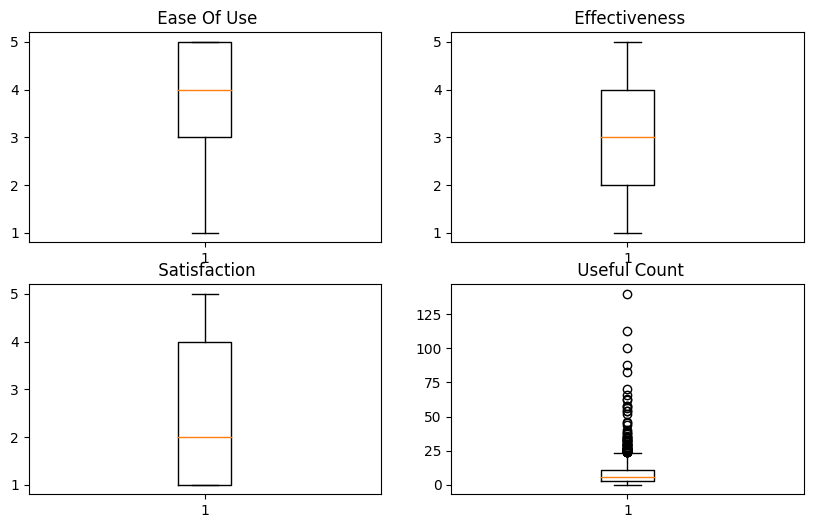

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_new["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_new["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_new["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_new["UsefulCount"])
plt.title(" Useful Count")
plt.show()


**Removing outliers**

In [ ]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [ ]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount']:
    index_list.extend(outliers(data_new,feature))
index_list

[14371,
 14373,
 14393,
 14435,
 14477,
 14481,
 14483,
 14543,
 14577,
 15231,
 15281,
 15307,
 15308,
 15311,
 15316,
 15324,
 15360,
 15432,
 15435,
 15436,
 15438,
 15449,
 15463,
 15467,
 15589,
 15629,
 15675,
 15843,
 15929,
 15958,
 15962,
 15963,
 15985,
 15992,
 15994,
 16011,
 16017,
 16020,
 16024,
 16165,
 16344,
 16526,
 16538,
 16541,
 16542,
 16544,
 16545,
 16682,
 16693,
 16697,
 16779,
 16852,
 17396,
 17479,
 17499,
 17972,
 18067,
 18085,
 18176,
 18322,
 18364,
 18504,
 18508,
 18684,
 18851,
 18891,
 18905,
 18939,
 18958,
 18990]

In [ ]:
#define a function called 'remove' which returns a cleaned data without outliers

def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df
data_new.shape

(3263, 14)

In [ ]:
data_new=remove(data_new,index_list)
data_new.shape

(3193, 14)

**UsefulCount column post removal of outliers**

Text(0.5, 1.0, 'Box plot of Useful Count')

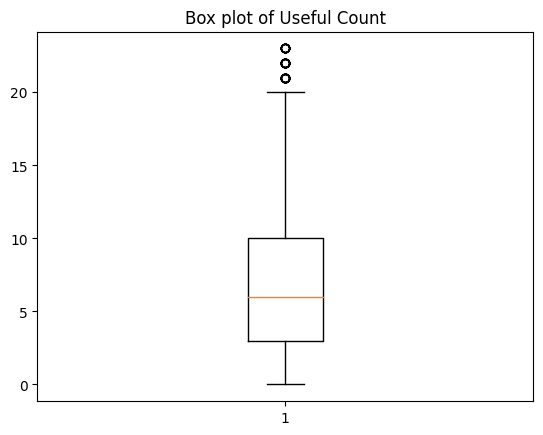

In [ ]:
plt.boxplot(data_new["UsefulCount"])
plt.title('Box plot of Useful Count')

 5.Feature engineering


In [ ]:
#Creation of a new SideEffects column

data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [ ]:
data_new['SideEffects']=data1
#Since DrugId is the same, dropping the column

data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1)
data_new.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects
14356,William Todd,White,75-100,High Blood Pressure,2/8/2020,lisinopril,5.0,4.0,I have developed a very itch rash on my body f...,Female,dizziness lightheadedness tiredness headache o...,3.0,Severe
14358,Christopher Anderson,Asian,55-64,High Blood Pressure,1/14/2020,lisinopril,4.0,5.0,"tried alternative medicine Beet root, hibiscus...",Male,dizziness lightheadedness tiredness headache o...,3.0,Severe
14364,Jaime Villa,Asian,65-74,High Blood Pressure,10/17/2019,lisinopril,5.0,5.0,Have been taking 10 mg doses per day for over ...,Male,dizziness lightheadedness tiredness headache o...,6.0,Extreme
14367,Timothy Brown,Asian,55-64,High Blood Pressure,10/13/2019,lisinopril,2.0,4.0,I don't like that I'm taking this and not know...,Male,dizziness lightheadedness tiredness headache o...,12.0,Mild
14369,Karen Rogers,Asian,55-64,High Blood Pressure,8/16/2019,lisinopril,3.0,1.0,Was on this medicine for about 2 months and ha...,Female,dizziness lightheadedness tiredness headache o...,22.0,Nil


In [ ]:
data_new.to_csv('drug_lisinopril_eda.csv', index=False)
data_copy = data_new.copy()

**Exploratory Data Analysis**

1. Top 20 Drugs

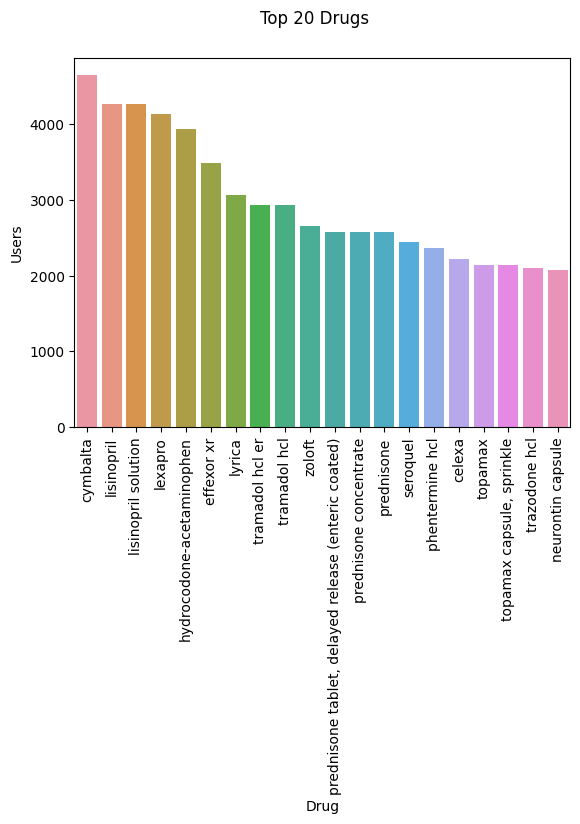

In [ ]:
data1= data['Drug'].value_counts().head(20).reset_index()
data1.columns = ['Drug', 'Users']
sns.barplot(data=data1, x = 'Drug', y = 'Users')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

**Insight**:

Cymbalta has the maximum number of users

2. Top 20 Conditions


Text(0, 0.5, 'Users')

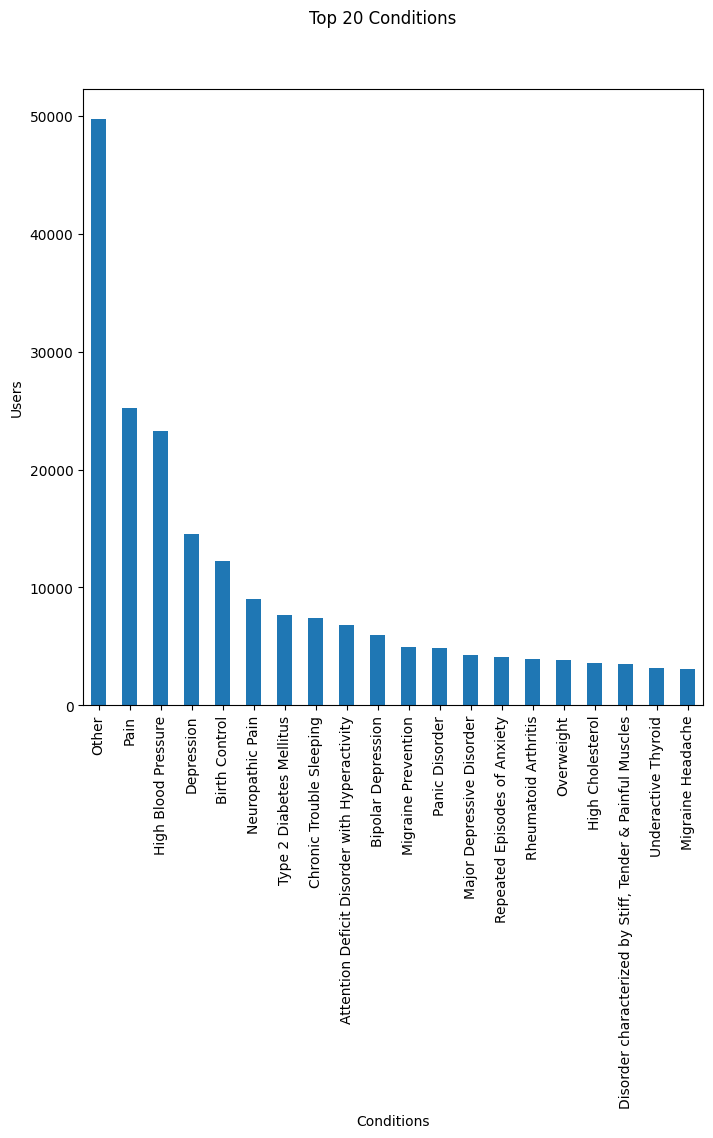

In [ ]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

**Insight**:

Out of 1806 Conditions, Other Conditions tops the chart followed respectively by Pain and High Blood Pressure.

The above being interpretation of the generic data, in line with the objective of OUR project,we will now move ahead by selecting a particular drug Lisinopril, one featuring in the top 5.

3. Top 12 Conditions - Lisinopril


Text(0, 0.5, 'Count')

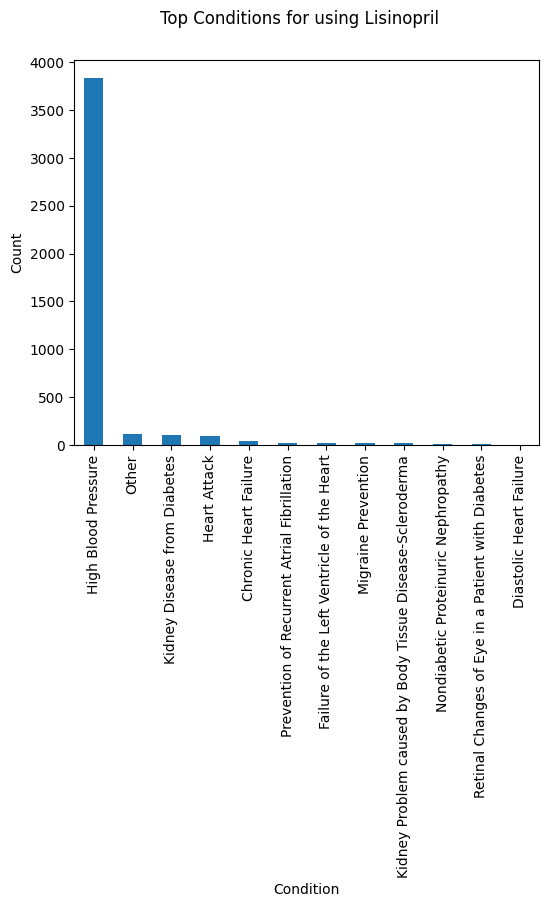

In [ ]:
drug_lisinopril['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(6,5))
plt.suptitle("Top Conditions for using Lisinopril")
plt.xlabel('Condition')
plt.ylabel('Count')

**Insight**:

Maximum users consume the drug for High blood pressure. The drug is mainly used for 12 conditions listed above.

4. Users by Gender - Lisinopril

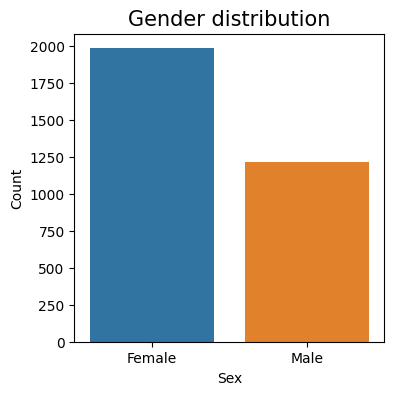

In [ ]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data_copy)
plt.title('Gender distribution', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

**Insight**:

Females uses the drug more compared to males.

5. Users by Race - Lisinopril

Text(0, 0.5, 'Count')

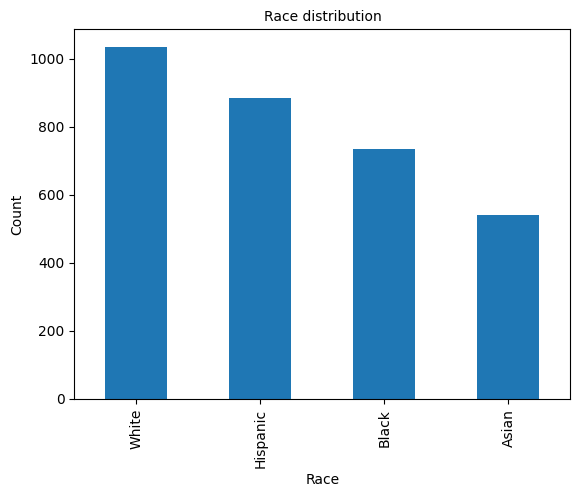

In [ ]:
data_copy['Race'].value_counts().plot(kind='bar')
plt.title("Race distribution", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

**Insight:**

Lisinopril drug is mostly consumed by Whites followed by Hispanic followed by Black and least used by Asian

6. Users by Race and Gender

Text(0.5, 1.0, 'Users by Race and Gender')

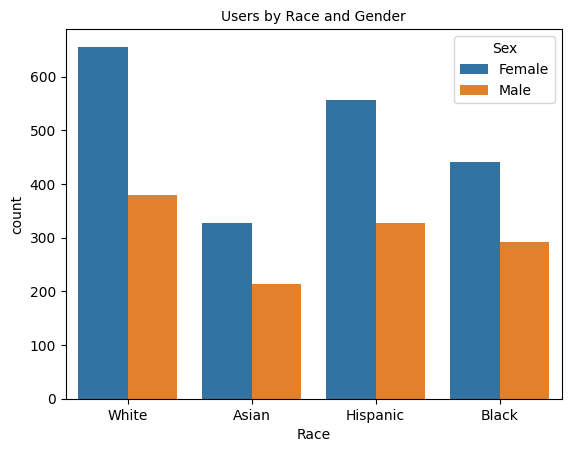

In [ ]:
sns.countplot(x='Race',hue='Sex',data=data_copy)
plt.title("Users by Race and Gender", fontsize = 10)

Insight:

Females dominate the consumption of Lisinopril drug within each race.

7. Users by Age and Gender

Text(0.5, 1.0, 'Users by Age and Gender')

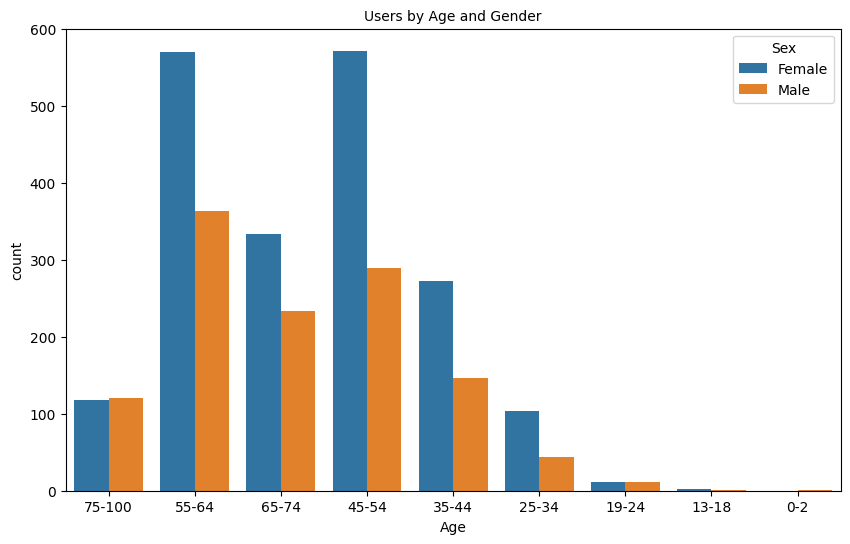

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data_copy)
plt.title("Users by Age and Gender", fontsize = 10)

Insight:

Consumption of the drug by female users is visbly dominant across age groups above 24 and below 75 years. Plus, people in the age groups 45 to 54 and 55 to 64 accounted for maximum usage of Lisinopril.

8. Correlation Heatmap

<Axes: >

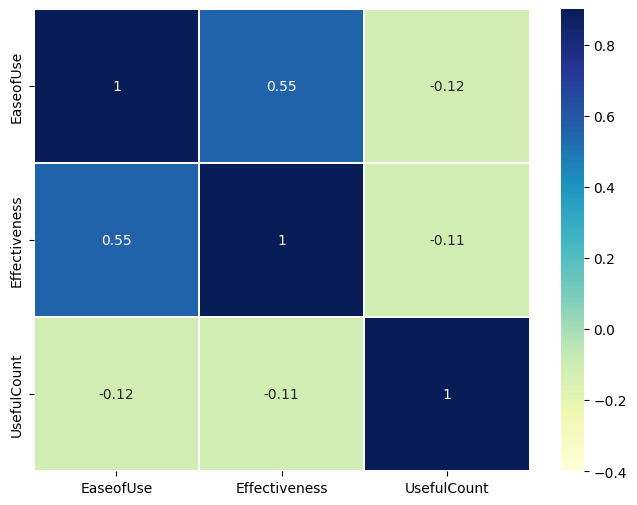

In [ ]:
corrmatrix = data_copy.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

**Insight:**

Correlation is used to find relationship between variables. Here, variables are weakly or moderately correlated to each other.

9. Effectiveness

In [ ]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], errors = 'coerce')
#extracting year from Date

data_copy['Year'] = data_copy['Date'].dt.year

Text(0, 0.5, 'Count')

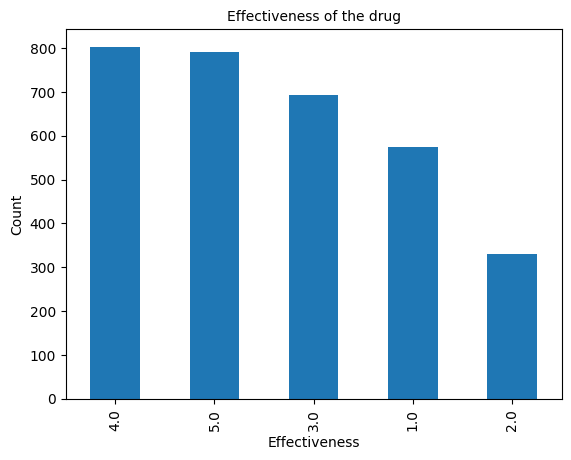

In [ ]:
data_copy['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness of the drug", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

**Insight**:

Most users found Lisinopril drug effective.But it cannot be considered the best drug as seen from the above graph

10. Ease of Use

Text(0, 0.5, 'Count')

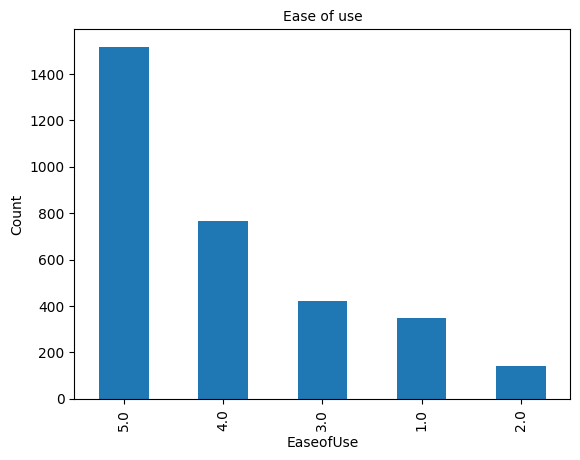

In [ ]:
data_copy['EaseofUse'].value_counts().plot(kind='bar')
plt.title("Ease of use", fontsize = 10)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

**Insight**:

Most users rated Lisinopril highly for its ease of use.

11. Useful Count

Text(0, 0.5, 'Count')

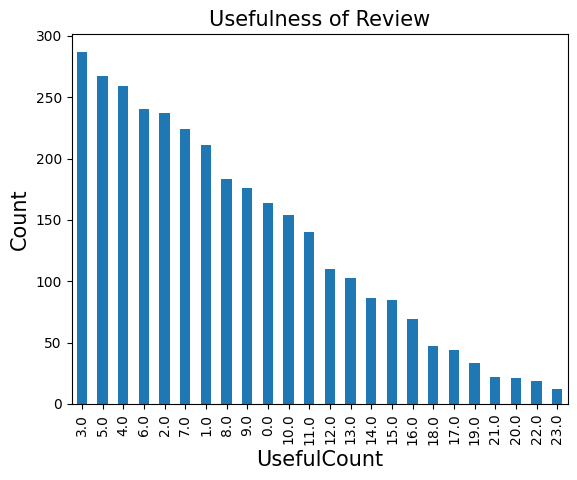

In [ ]:
data_copy['UsefulCount'].value_counts().plot(kind='bar')
plt.title("Usefulness of Review", fontsize = 15)
plt.xlabel("UsefulCount", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

**Insight**:

As with usefulness of reviews, Lisinopril users throw a mixed bag with most not finding the reviews beneficial.

12. Users by Effectiveness and Gender

<Figure size 1000x800 with 0 Axes>

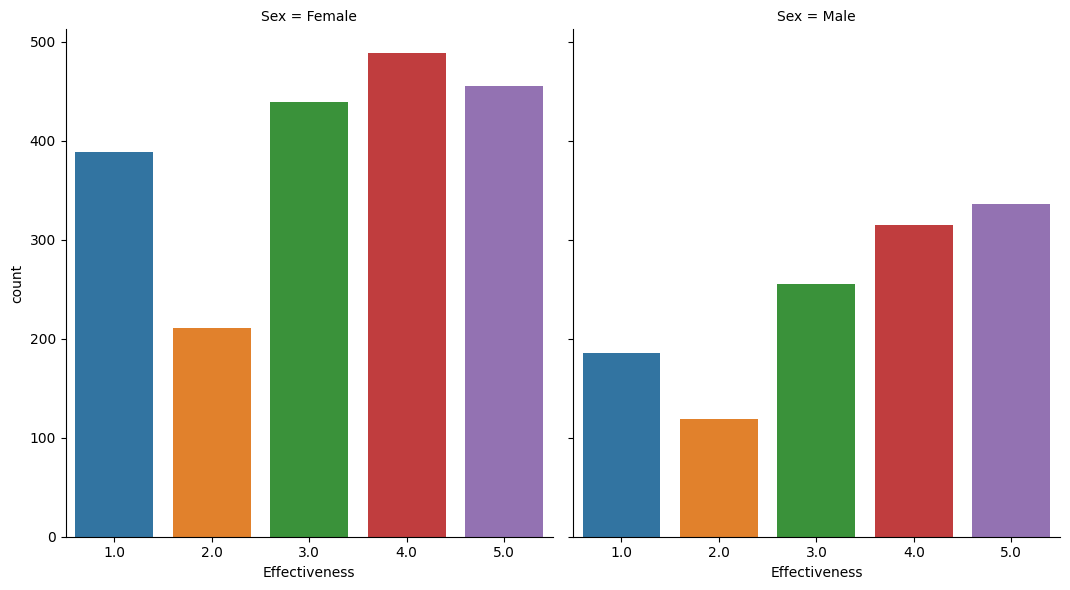

In [ ]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data_copy, kind="count",
                height=6,aspect =.9)

Insight:

Males and females have similar kind of effectiveness review for the drug. Graphs look different as the male consumption of the is drug is low compared to females.Most males were totally satisfied with the effectiveness of the drug. But thats not the case with females.

13. Side Effects

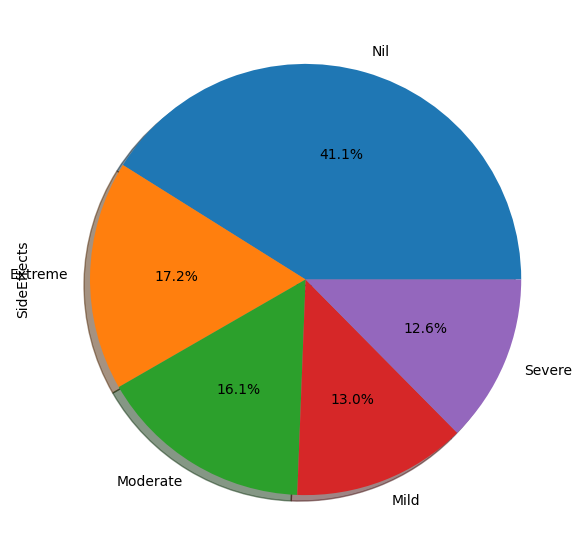

In [ ]:
plt.figure(figsize=(7,7))
data_copy['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Insight:

Majority of consumers did not have any side effects. Many had Extreme side effects, some had Moderate side effects, a few had Mild side effect and a very few had Severe side effect.

14. Side Effects with respect to Age


<Axes: xlabel='Age', ylabel='count'>

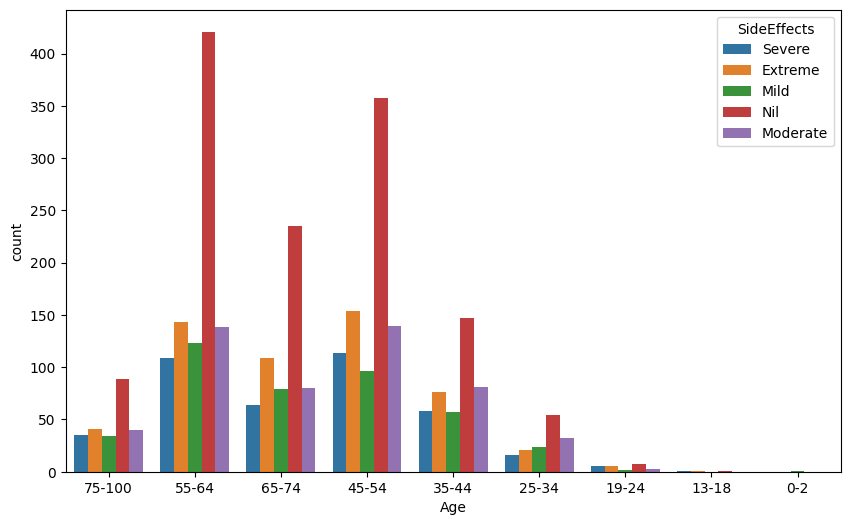

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=data_copy)

**Insight**:

In almost all age groups majority of consumers did not have any side effects. No side effects topped in the age groups between 55-64.

15. Side Effects with respect to Gender

<Figure size 2000x1000 with 0 Axes>

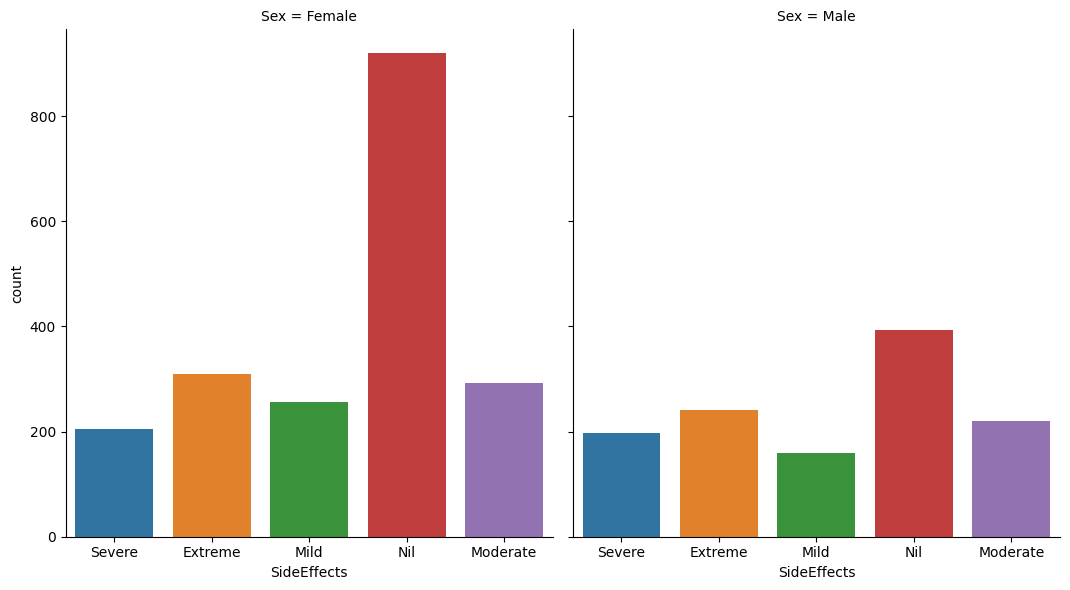

In [ ]:
plt.figure(figsize=(20,10))
g = sns.catplot(x="SideEffects",col="Sex",data=data_copy, kind="count",height=6,aspect =.9)

**Insight:**

For females, majority did not have any side effects. In the case of males, Extreme and Moderate side effect cases are not very low compared to no side effects.

16. Side Effects with respect to Race

<Axes: xlabel='Race', ylabel='count'>

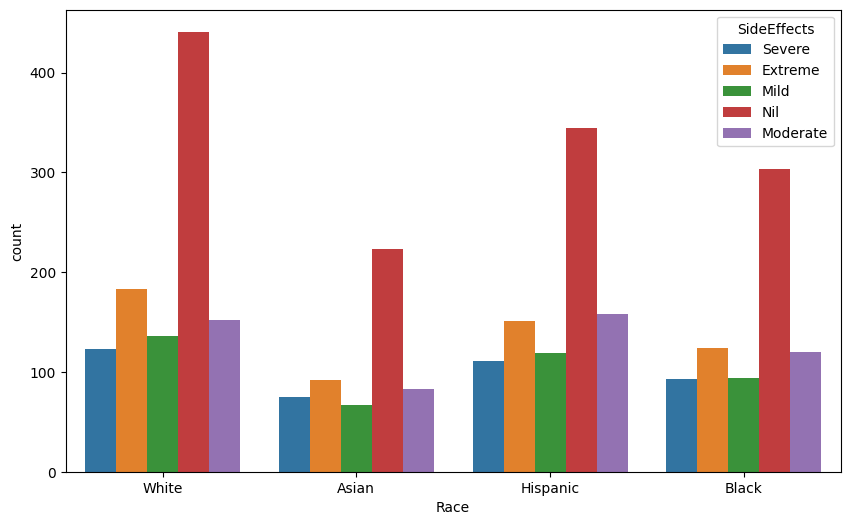

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='SideEffects',data=data_copy)

Insight:

Side effects proved race neutral with proportionate results.

**6.Feature reduction**

Correlation analysis

<Axes: >

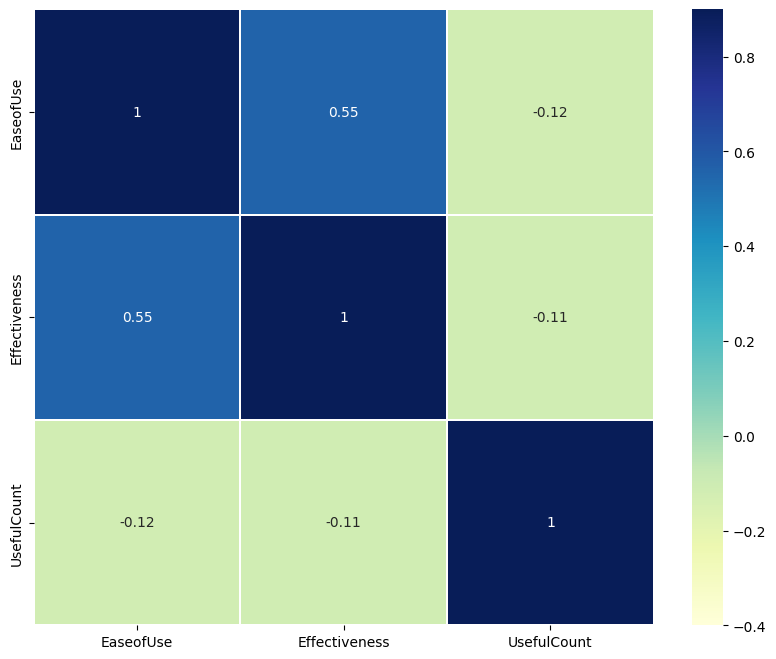

In [ ]:
corrmatrix = data_new.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

Correlation matrix is plotted to check the relationship between variables

**Dropping the Drug and Sides column as there is only one variable in that feature. The other columns such as Name, Race, Date, EaseofUse, Reviews and UsefulCount are also being dropped as these does not contribute anything towards the side effects of the drug.**

In [ ]:
data_new=data_new.drop(columns = ['Name','Race','Date','Drug','EaseofUse','Reviews','Sides','UsefulCount'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Age,Condition,Effectiveness,Sex,SideEffects
0,75-100,High Blood Pressure,4.0,Female,Severe
1,55-64,High Blood Pressure,5.0,Male,Severe
2,65-74,High Blood Pressure,5.0,Male,Extreme
3,55-64,High Blood Pressure,4.0,Male,Mild
4,55-64,High Blood Pressure,1.0,Female,Nil


In [ ]:
data_new.shape


(3193, 5)

**7.Encoding**

In [ ]:
#Finding categorical columns and chnaging datatype

for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            3193 non-null   category
 1   Condition      3193 non-null   category
 2   Effectiveness  3193 non-null   float64 
 3   Sex            3193 non-null   category
 4   SideEffects    3193 non-null   category
dtypes: category(4), float64(1)
memory usage: 38.6 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            3193 non-null   category
 1   Condition      3193 non-null   category
 2   Effectiveness  3193 non-null   float64 
 3   Sex            3193 non-null   category
 4   SideEffects    3193 non-null   category
dtypes: category(4), float64(1)
memory usage: 38.6 KB


In [ ]:
data_new.columns

Index(['Age', 'Condition', 'Effectiveness', 'Sex', 'SideEffects'], dtype='object')

In [ ]:
data_new.head()


,Age,Condition,Effectiveness,Sex,SideEffects
0,75-100,High Blood Pressure,4.0,Female,Severe
1,55-64,High Blood Pressure,5.0,Male,Severe
2,65-74,High Blood Pressure,5.0,Male,Extreme
3,55-64,High Blood Pressure,4.0,Male,Mild
4,55-64,High Blood Pressure,1.0,Female,Nil


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in ['Age','Condition','Sex','SideEffects']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new
data_new.head()

,Age,Condition,Effectiveness,Sex,SideEffects
0,8,4,4.0,0,4
1,6,4,5.0,1,4
2,7,4,5.0,1,0
3,6,4,4.0,1,1
4,6,4,1.0,0,3


**Splitting the data**

Selecting the most important and relevent features with respect to the target column for modelling

In [ ]:
#target

y = data_new['SideEffects']

In [ ]:
X = data_new.drop(['SideEffects'],axis=1)
X.shape

(3193, 4)

In [ ]:
X.head()


,Age,Condition,Effectiveness,Sex
0,8,4,4.0,0
1,6,4,5.0,1
2,7,4,5.0,1
3,6,4,4.0,1
4,6,4,1.0,0


In [ ]:
y.head()


0    4
1    4
2    0
3    1
4    3
Name: SideEffects, dtype: int64

**Splitting the dataset into train and test sets**

In [ ]:
#Importing train_test_split from the sklearn.model_selection library and 
#splitting the data,by keeping 80% of the data in train dataset and the rest 20% in test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)

In [ ]:
X_train.shape

(2554, 4)

In [ ]:
X_test.shape

(639, 4)

In [ ]:
y_train.shape

(2554,)

In [ ]:
y_test.shape

(639,)

**Model Building**

1. Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

In [ ]:
##Performance Evaluation

print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  53.834115805946794


In [ ]:
##Confusion Matrix of Logistic Regression Model

confusion_matrix(y_test,y_pred)

array([[ 77,   0,   5,  14,   2],
       [  9,   0,   5,  80,   5],
       [ 14,   0,  10,  67,   6],
       [ 20,   0,   1, 241,   8],
       [ 17,   0,   8,  34,  16]])

2. KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
acc_values = []
neighbors = np.arange(3,15)

# creating a loop to create KNN model for each K value
for k in neighbors:
#taking the instance of KNN to a variable.the variable name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')    #no: of neighbors n the methode to measure the distance .instance is created
#we have to create the model.
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train,y_train)
#have to predict output using this model.
    y_pred = classifier.predict(X_test)#KNN is created
#append the accurcy values to empty list in order to fing out maximum accuracy.
    acc = accuracy_score(y_test, y_pred)#taking accuracy values to variable acc 
#append these accuracy values to our list
    acc_values.append(acc)

In [ ]:
acc_values


[0.4945226917057903,
 0.5007824726134585,
 0.5070422535211268,
 0.5258215962441315,
 0.5117370892018779,
 0.5179968701095462,
 0.5101721439749609,
 0.513302034428795,
 0.5179968701095462,
 0.5242566510172144,
 0.5211267605633803,
 0.5242566510172144]

Text(0, 0.5, 'accuracy')

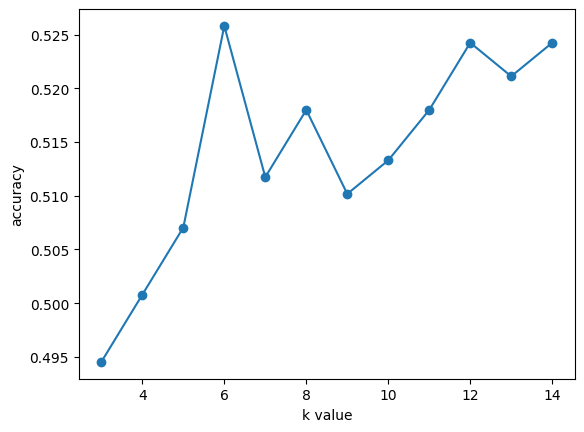

In [ ]:
#To find which k value got the highest accuracy, plotted a graph between neighbor values (i.e. k values) and accuracy values

plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:
#KNN model with k=14

classifier = KNeighborsClassifier(n_neighbors= 14, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#Performance Evaluation

print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  52.42566510172144


In [ ]:
#Confusion Matrix for KNN Classifier

confusion_matrix(y_test,y_pred)

array([[ 78,   6,   1,   7,   6],
       [ 11,  11,  21,  51,   5],
       [ 14,  16,  28,  27,  12],
       [ 20,  23,  20, 202,   5],
       [ 18,   6,   8,  27,  16]])

3. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

In [ ]:
#Performance Evaluation

print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.08607198748044
